# Importing neccessary libs

In [2]:
import os
import tarfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from PIL import Image

In [3]:
PATH = 'dataset'

# EDA

In [4]:
arch = tarfile.open(os.path.join('..', PATH, 'crop_part1.tar.gz'), 'r')
arch.getnames()

['crop_part1/24_1_2_20170104020224692.jpg.chip.jpg',
 'crop_part1/3_1_3_20161219230106056.jpg.chip.jpg',
 'crop_part1/35_0_0_20170105162448427.jpg.chip.jpg',
 'crop_part1/5_0_0_20170110213554657.jpg.chip.jpg',
 'crop_part1/23_1_4_20170103223615095.jpg.chip.jpg',
 'crop_part1/20_1_3_20170104231456714.jpg.chip.jpg',
 'crop_part1/4_1_3_20161220220636202.jpg.chip.jpg',
 'crop_part1/90_1_0_20170110182426286.jpg.chip.jpg',
 'crop_part1/35_1_0_20170103182746666.jpg.chip.jpg',
 'crop_part1/85_1_0_20170110181324285.jpg.chip.jpg',
 'crop_part1/1_0_2_20161219211107805.jpg.chip.jpg',
 'crop_part1/41_0_4_20170104205137196.jpg.chip.jpg',
 'crop_part1/26_0_3_20170104230509745.jpg.chip.jpg',
 'crop_part1/11_1_4_20170109201611941.jpg.chip.jpg',
 'crop_part1/26_1_3_20170104223130527.jpg.chip.jpg',
 'crop_part1/80_1_0_20170109142913604.jpg.chip.jpg',
 'crop_part1/30_0_0_20170103181149464.jpg.chip.jpg',
 'crop_part1/51_1_0_20170110160643172.jpg.chip.jpg',
 'crop_part1/1_1_0_20170109191822349.jpg.chip.jpg'

In [5]:
p1_path = arch.getnames()[0].split('/')[0]
p1_path += '/'
p1_path

'crop_part1/'

## Illustrate data

age [24], gender[1], race [2]
age [3], gender[1], race [3]
age [35], gender[0], race [0]


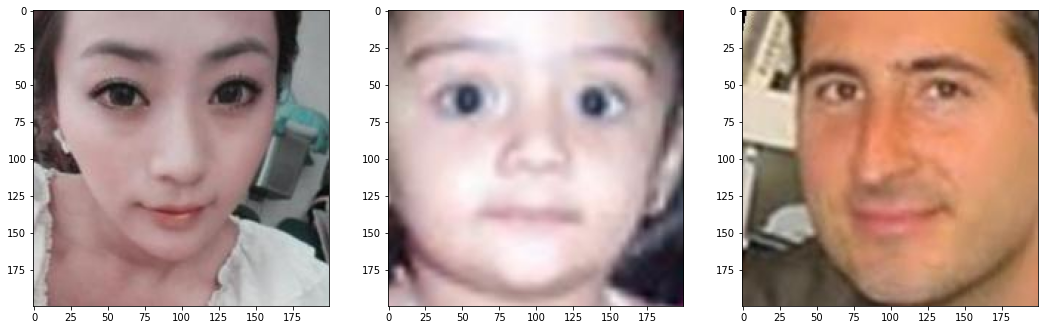

In [6]:
fig, axs = plt.subplots(1,3, figsize= (18,7))

cnt = 0
for name in arch.getnames():
    extrd_file = arch.extractfile(name)
    img = Image.open(extrd_file)

    name = name.replace(p1_path, '')

    age = name.split('_')[0]
    gender = name.split('_')[1]
    race = name.split('_')[2]

    print(f'age [{age}], gender[{gender}], race [{race}]')
    axs[cnt].imshow(img)

    if cnt == 2:
        break

    cnt += 1
    

## Collect some metrics

In [7]:
f_names = []
shapes_arr = []
ages_arr = []
races_arr = []
genders_arr = []

for name in arch.getnames():
    extrd_file = arch.extractfile(name)
    if extrd_file != None:
        img = Image.open(extrd_file)

        f_names.append(name)

        name = name.replace(p1_path, '')

        shapes_arr.append(img.size)
        ages_arr.append(name.split('_')[0])
        genders_arr.append(name.split('_')[1])
        races_arr.append(name.split('_')[2])

print(f'{len(f_names)}/{len(arch.getnames())} read\nLengths: shapes {len(shapes_arr)}, ages {len(ages_arr)}, races {len(races_arr)}, genders {len(genders_arr)}')

9780/9781 read
Lengths: shapes 9780, ages 9780, races 9780, genders 9780


In [8]:
np.unique(races_arr)

array(['0', '1', '2', '20170109142408075.jpg.chip.jpg',
       '20170109150557335.jpg.chip.jpg', '3', '4'], dtype='<U30')

In [9]:
rem_indxs = [races_arr.index('20170109142408075.jpg.chip.jpg'), races_arr.index('20170109150557335.jpg.chip.jpg')]

races_arr.remove('20170109142408075.jpg.chip.jpg')
races_arr.remove('20170109150557335.jpg.chip.jpg')


In [10]:
np.unique(races_arr)

array(['0', '1', '2', '3', '4'], dtype='<U1')

In [11]:
del shapes_arr[rem_indxs[0]]
del shapes_arr[rem_indxs[1]]

del ages_arr[rem_indxs[0]]
del ages_arr[rem_indxs[1]]

del genders_arr[rem_indxs[0]]
del genders_arr[rem_indxs[1]]

del f_names[rem_indxs[0]]
del f_names[rem_indxs[1]]

In [12]:
ages_arr = np.array(ages_arr, dtype= np.int32)
np.unique(ages_arr)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  95,  96,  99, 100, 101, 110])

In [13]:
shapes_arr[:5]

[(200, 200), (200, 200), (200, 200), (200, 200), (200, 200)]

In [14]:
np.unique(genders_arr)

array(['0', '1'], dtype='<U1')

In [15]:
print(f'{len(f_names)}/{len(arch.getnames())} after cleaning\nLengths: shapes {len(shapes_arr)}, ages {len(ages_arr)}, races {len(races_arr)}, genders {len(genders_arr)}')

9778/9781 after cleaning
Lengths: shapes 9778, ages 9778, races 9778, genders 9778


d:\Projects\Python\Faces_UTK\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Shapes')

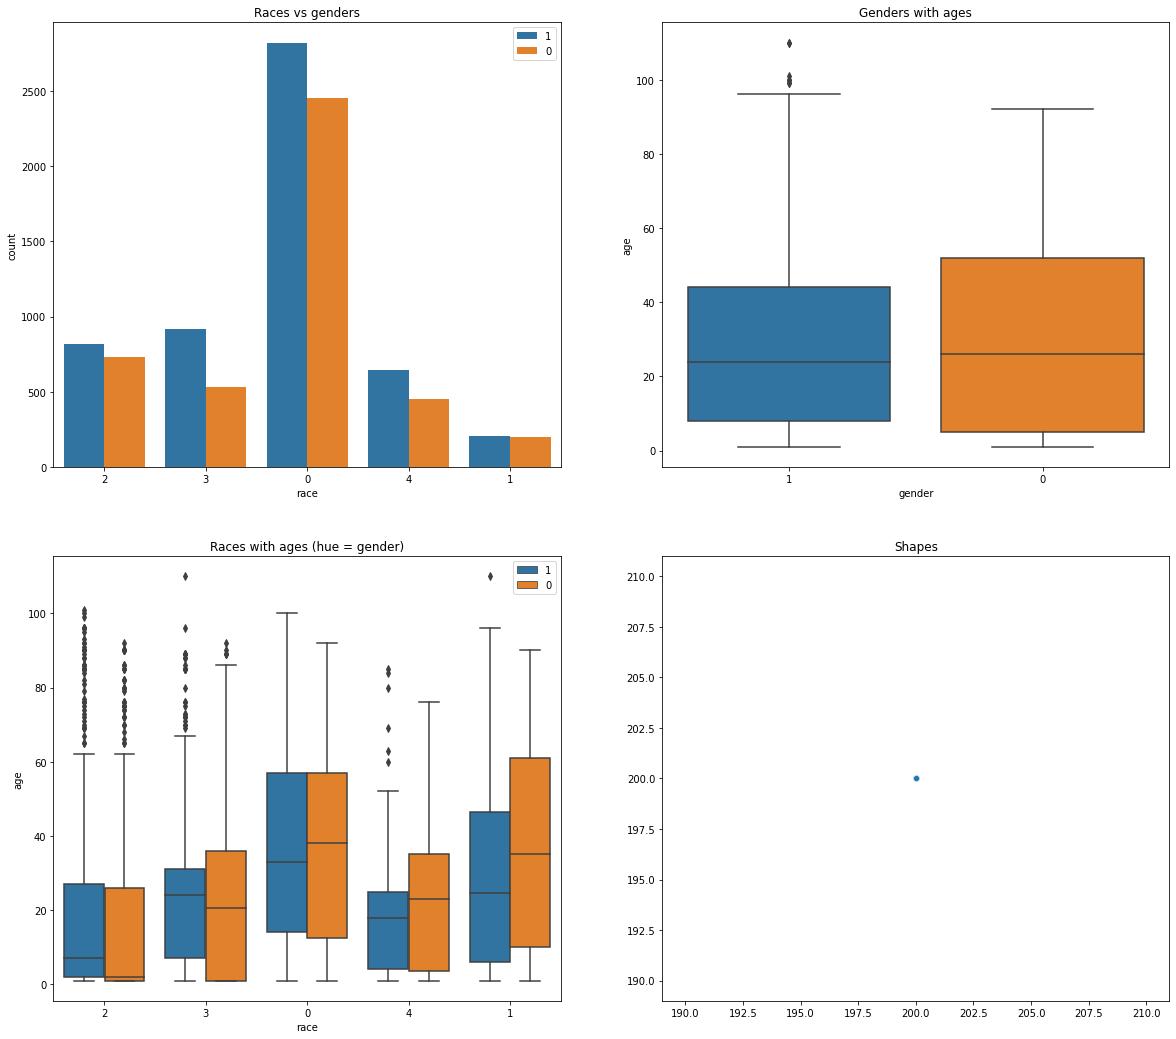

In [16]:
fig, axs = plt.subplots(2,2, figsize= (20,18))

sns.countplot(x= races_arr, hue= genders_arr, ax= axs[0][0])
axs[0][0].set_xlabel('race')
axs[0][0].set_title('Races vs genders')

sns.boxplot(x= genders_arr, y= ages_arr, ax= axs[0][1])
axs[0][1].set_xlabel('gender')
axs[0][1].set_ylabel('age')
axs[0][1].set_title('Genders with ages')

sns.boxplot(x= races_arr, y= ages_arr, hue= genders_arr, ax= axs[1][0])
axs[1][0].set_xlabel('race')
axs[1][0].set_ylabel('age')
axs[1][0].set_title('Races with ages (hue = gender)')

sns.scatterplot(*zip(*shapes_arr), ax = axs[1][1])
axs[1][1].set_title('Shapes')

## Reading landmarks

In [66]:
landmarks_df = pd.read_csv(os.path.join('..', PATH, 'landmark_list_part1.txt'), sep= ' ', header= None)
landmarks_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,1_0_2_20161219140530307.jpg,-4,71,-4,96,-3,120,-1,144,9,...,136,130,135,108,139,98,140,88,139,NaN
1,1_0_2_20161219140525218.jpg,13,76,13,96,15,117,18,137,25,...,137,121,141,102,141,94,142,85,143,NaN
2,1_0_2_20161219140540938.jpg,11,62,14,84,18,105,23,127,33,...,135,135,136,109,147,99,148,90,146,NaN


In [21]:
landmarks_df.iloc[1977]

0      21_1_4_20170103180619480.jpg
1                                21
2                                46
3                                24
4                                68
                   ...             
133                              99
134                             144
135                              90
136                             142
137                             NaN
Name: 1977, Length: 138, dtype: object

In [65]:
zz = np.array(landmarks_df.iloc[1977][1:-1])
zz = zz.reshape(68, 2)
zz[:5]

array([[21, 46],
       [24, 68],
       [29, 89],
       [34, 110],
       [41, 130]], dtype=object)

In [ ]:
landmarks_df.describe()

,1,2,3,4,5,6,7,8,9,10,...,128,129,130,131,132,133,134,135,136,137
count,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,...,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,9780.000000,0.0
mean,9.918609,61.857464,10.972188,84.719018,13.476380,107.346728,17.431186,129.760327,25.714622,150.496319,...,138.110020,128.926892,138.877198,107.765133,145.418405,98.200920,146.469223,88.585378,145.391922,NaN
std,13.666058,9.483940,13.083191,8.634148,13.108402,8.222673,13.346203,8.382683,12.579200,8.608225,...,2.757203,6.906137,4.122790,2.417585,6.024508,1.626935,6.130311,2.425950,5.983828,NaN
min,-41.000000,18.000000,-42.000000,44.000000,-41.000000,67.000000,-33.000000,89.000000,-17.000000,111.000000,...,108.000000,103.000000,107.000000,90.000000,112.000000,83.000000,117.000000,71.000000,120.000000,NaN
25%,-2.000000,56.000000,0.000000,79.000000,2.000000,102.000000,7.000000,124.000000,16.000000,145.000000,...,136.000000,124.000000,136.000000,106.000000,141.000000,97.000000,142.000000,87.000000,141.000000,NaN
50%,9.000000,62.000000,10.000000,85.000000,13.000000,107.000000,17.000000,130.000000,25.000000,150.000000,...,138.000000,129.000000,139.000000,108.000000,145.000000,98.000000,146.000000,89.000000,145.000000,NaN
75%,19.000000,68.000000,20.000000,90.000000,22.000000,112.000000,26.000000,135.000000,34.000000,156.000000,...,140.000000,134.000000,141.000000,109.000000,150.000000,99.000000,151.000000,90.000000,150.000000,NaN
max,63.000000,102.000000,63.000000,121.000000,67.000000,142.000000,72.000000,162.000000,77.000000,182.000000,...,175.000000,154.000000,171.000000,129.000000,183.000000,123.000000,185.000000,117.000000,183.000000,NaN


image shape = (200, 200)


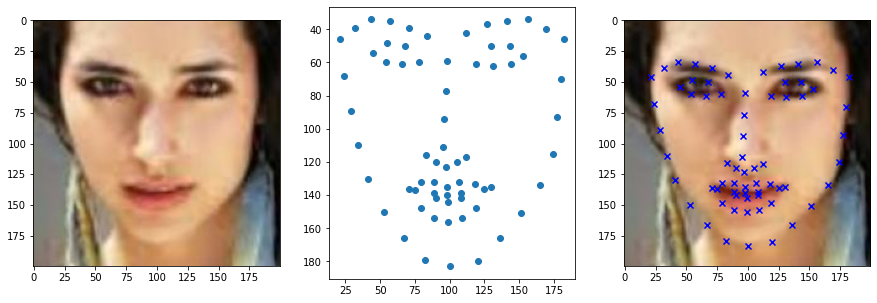

In [64]:
test = arch.extractfile('crop_part1/' + landmarks_df[0][1977] + '.chip.jpg')

fig, axs = plt.subplots(1,3, figsize= (15, 5))

axs[0].imshow(Image.open(test))

axs[1].scatter(*zip(*zz))
axs[1].invert_yaxis()

axs[2].imshow(Image.open(test))
axs[2].scatter(*zip(*zz), marker= 'x', color= 'b')

print(f'image shape = {Image.open(test).size}')

In [ ]:
landmarks_df[0][1977] + '.chip.jpg'

'21_1_4_20170103180619480.jpg.chp.jpg'